# Vector AutoRegression VAR

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools

from statsmodels.tsa.api import VAR#, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('./UDEMY_TSA_FINAL/Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('./UDEMY_TSA_FINAL/Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [2]:
df.head(), sp.head()

(             Money
 Date              
 1995-01-01  3492.4
 1995-02-01  3489.9
 1995-03-01  3491.1
 1995-04-01  3499.2
 1995-05-01  3524.2,
             Spending
 Date                
 1995-01-01    4851.2
 1995-02-01    4850.8
 1995-03-01    4885.4
 1995-04-01    4890.2
 1995-05-01    4933.1)

In [3]:
df=df.join(sp)

In [4]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [5]:
df=df.dropna()

In [6]:
df.shape

(252, 2)

#### plotting the data

<AxesSubplot:title={'center':'M2 money stock vs personal consumption expenditures'}, xlabel='Date', ylabel='billions of dollars'>

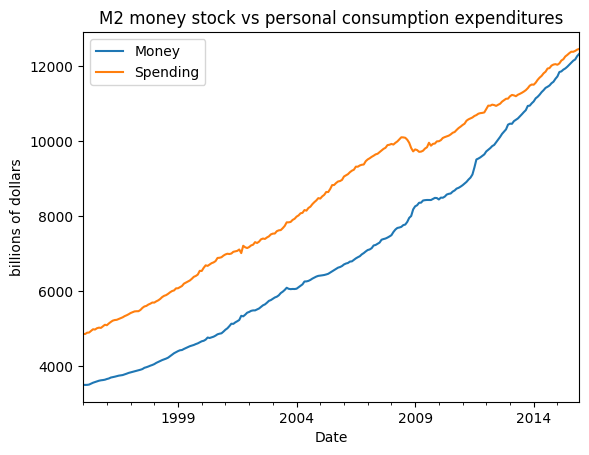

In [7]:
df.plot(ylabel="billions of dollars",title="M2 money stock vs personal consumption expenditures")

#### stationary test

In [8]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [9]:
adf_test(df["Money"],title='Money')

Augmented Dickey-Fuller Test: Money
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [10]:
adf_test(df["Spending"],title='Money')

Augmented Dickey-Fuller Test: Money
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [11]:
df_transformed=df.diff() #shiftted one 

In [13]:
df_transformed

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
...,...,...
2015-08-01,51.5,38.6
2015-09-01,57.0,-1.2
2015-10-01,33.9,23.3


In [16]:
df_transformed=df_transformed.dropna()

In [15]:
df_transformed

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
...,...,...
2015-08-01,51.5,38.6
2015-09-01,57.0,-1.2
2015-10-01,33.9,23.3


In [19]:
#now check stationary again

adf_test(df_transformed["Money"]), #this is still not stationary

adf_test(df_transformed["Spending"]) #this is stationary

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [20]:
#we do one more diff to make money db stationary

df_transformed=df_transformed.diff().dropna()

In [22]:
#check the stationary again
adf_test(df_transformed["Money"]), #this is now stationary

adf_test(df_transformed["Spending"]) # this is stationary too

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [24]:
df_transformed.head()#stationary dataset

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


#### train/test

In [25]:
#using 12 months
nobs=12
train,test=df_transformed[0:-nobs],df_transformed[-nobs:]

In [26]:
train.shape, test.shape

((238, 2), (12, 2))

## VAR Model Order Selection

In [27]:
for i in [1,2,3,4,5,6,7]:
    model=VAR(train)
    results=model.fit()
    print("Order=",i)
    print("AIC:", results.aic)
    print("BIC:",results.bic)
    print()

Order= 1
AIC: 14.178610495220896
BIC: 14.266409486135709

Order= 2
AIC: 14.178610495220896
BIC: 14.266409486135709

Order= 3
AIC: 14.178610495220896
BIC: 14.266409486135709

Order= 4
AIC: 14.178610495220896
BIC: 14.266409486135709

Order= 5
AIC: 14.178610495220896
BIC: 14.266409486135709

Order= 6
AIC: 14.178610495220896
BIC: 14.266409486135709

Order= 7
AIC: 14.178610495220896
BIC: 14.266409486135709



In [28]:
model=VAR(train)
for i in [1,2,3,4,5,6,7]:
    results=model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()


Order = 1
AIC:  14.178610495220896
BIC:  14.266409486135709

Order = 2
AIC:  13.955189367163703
BIC:  14.101961901274956

Order = 3
AIC:  13.849518291541038
BIC:  14.055621258341116

Order = 4
AIC:  13.827950574458281
BIC:  14.093744506408875

Order = 5
AIC:  13.78730034460964
BIC:  14.113149468980652

Order = 6
AIC:  13.799076756885809
BIC:  14.185349048538068

Order = 7
AIC:  13.79763872791397
BIC:  14.24470596304667



#### var 5 seems returing the lowest scores

In [29]:
model.endog_names

['Money', 'Spending']

### Fitting VAR 5 Model

In [30]:
results=model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Jul, 2023
Time:                     14:43:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

### Predicting next 12 months

In [33]:
lag_order=results.k_ar
lag_order

5

In [37]:
z=results.forecast(y=train.values[-lag_order:],steps=12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [38]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [42]:
idx=pd.date_range("1/1/2015",periods=12,freq="MS")
df_forecast=pd.DataFrame(z,index=idx,columns=["Money2d","Spending2d"])
df_forecast

,Money2d,Spending2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


## Invering the diff transformation to real values

In [43]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [44]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [45]:
df_forecast


,Money2d,Spending2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375
2015-10-01,0.225877,0.786927,59.620028,12264.416289,33.128643,12405.405019


### plotting the results

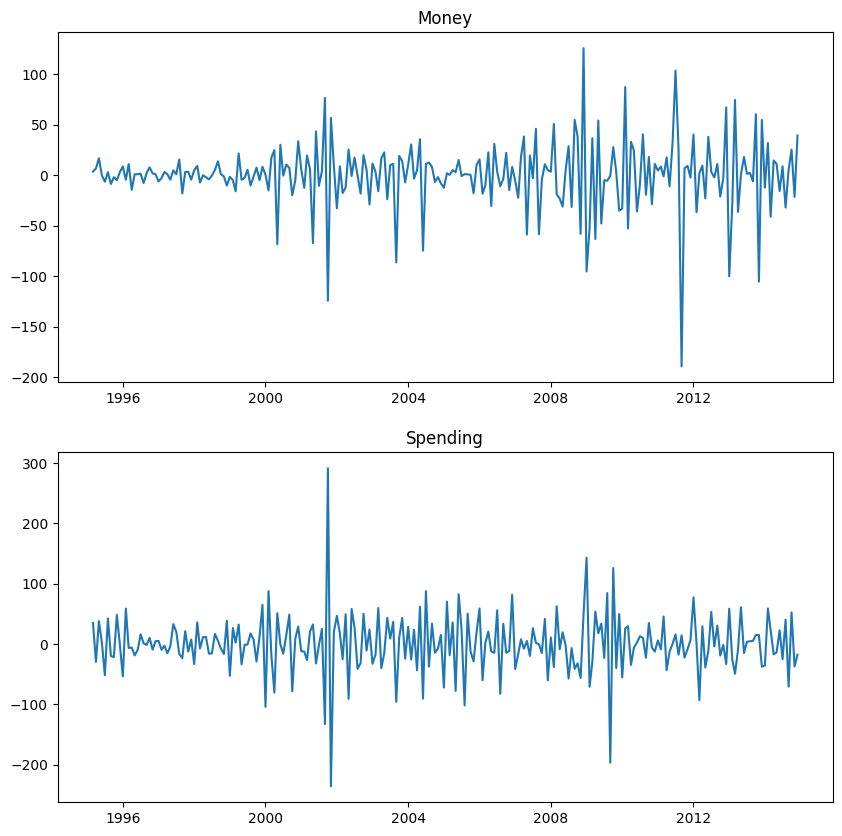

In [46]:
results.plot();

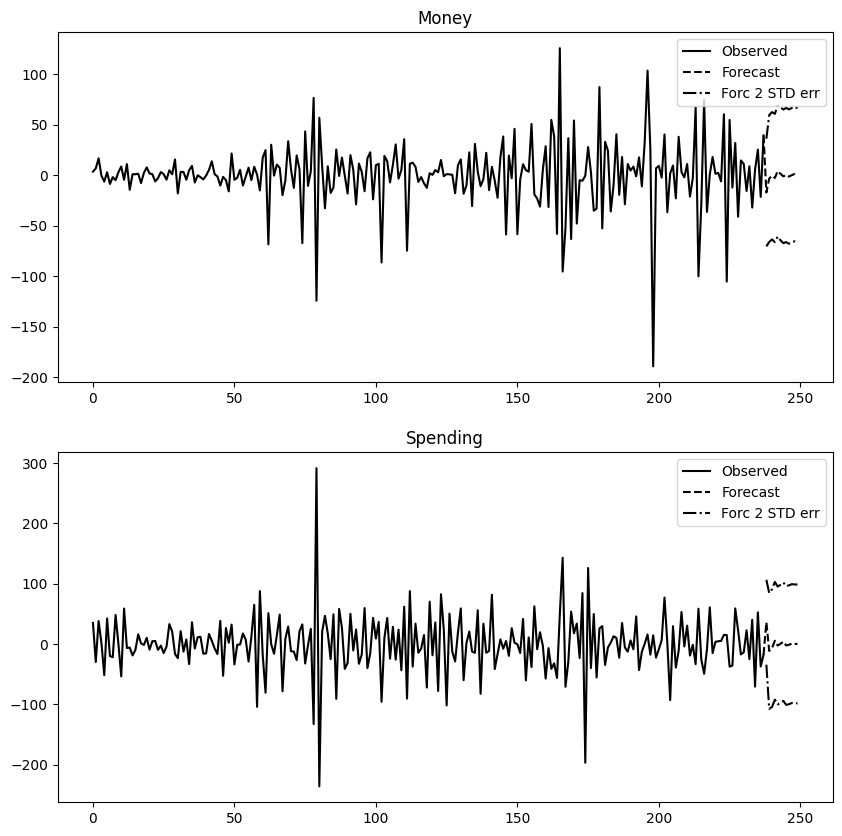

In [47]:
results.plot_forecast(12);

#### plot predicting vs test values

<AxesSubplot:xlabel='Date'>

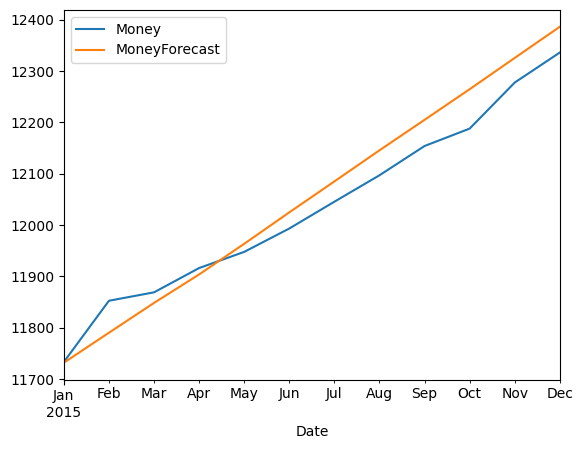

In [51]:
df["Money"][-nobs:].plot(legend=True)
df_forecast["MoneyForecast"].plot(legend=True)

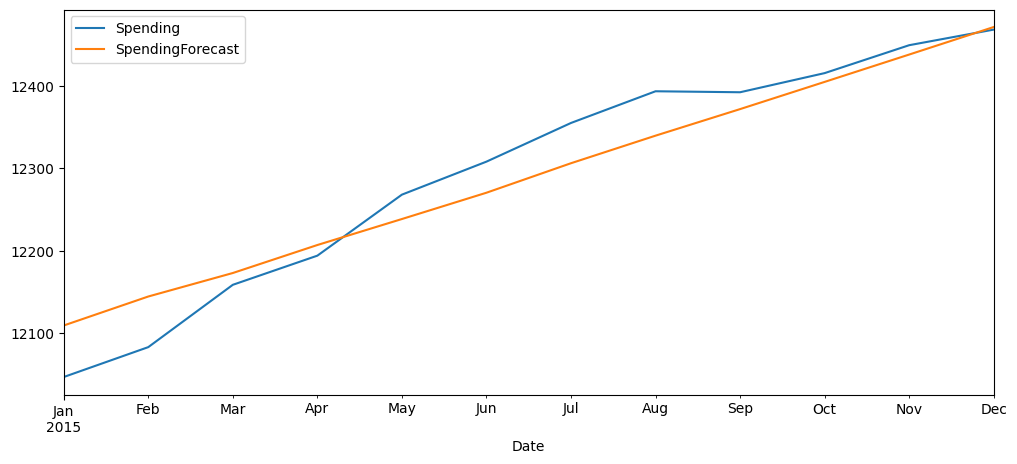

In [52]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

#### Evaluate the model

In [56]:
RMSE1=rmse(df["Money"][-nobs:],df_forecast["MoneyForecast"])
#RMSE1
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 43.710


In [57]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 37.001


#### Comparing AR(5) model

In [62]:
from statsmodels.tsa.ar_model import AutoReg #AR#,ARResults

In [70]:
modelM = AutoReg(train['Money'],lags=5)
AR5fit1 = modelM.fit()
#print(f'Lag: {AR5fit1.k_ar}')
print(f'Coefficients:\n{AR5fit1.params}')

Coefficients:
const       0.467296
Money.L1   -0.609867
Money.L2   -0.470648
Money.L3   -0.231296
Money.L4   -0.315501
Money.L5   -0.129869
dtype: float64


In [71]:
start=len(train)
end=len(train)+len(test)-1
z1 = pd.DataFrame(AR5fit1.predict(start=start, end=end, dynamic=False),columns=['Money'])

In [72]:
z1

,Money
2015-01-01,-17.119701
2015-02-01,-11.528475
2015-03-01,9.827790
2015-04-01,-5.836863
2015-05-01,2.339541
2015-06-01,5.375022
2015-07-01,-4.165296
2015-08-01,0.501917
2015-09-01,0.898255
2015-10-01,-1.352987


#### inverting the transformation

In [73]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + z1['Money'].cumsum()

# Now build the forecast values from the first difference set
z1['MoneyForecast'] = df['Money'].iloc[-nobs-1] + z1['Money1d'].cumsum()

In [74]:
z1

,Money,Money1d,MoneyForecast
2015-01-01,-17.119701,61.480299,11731.580299
2015-02-01,-11.528475,49.951824,11781.532123
2015-03-01,9.827790,59.779614,11841.311736
2015-04-01,-5.836863,53.942751,11895.254487
2015-05-01,2.339541,56.282292,11951.536779
2015-06-01,5.375022,61.657314,12013.194093
2015-07-01,-4.165296,57.492019,12070.686112
2015-08-01,0.501917,57.993936,12128.680048
2015-09-01,0.898255,58.892191,12187.572238
2015-10-01,-1.352987,57.539203,12245.111442


In [75]:
RMSE3 = rmse(df['Money'][-nobs:], z1['MoneyForecast'])

print(f'Money VAR(5) RMSE: {RMSE1:.3f}')
print(f'Money  AR(5) RMSE: {RMSE3:.3f}')

Money VAR(5) RMSE: 43.710
Money  AR(5) RMSE: 34.394


#### Personal Spending

In [76]:
modelS = AutoReg(train['Spending'],lags=5)
AR5fit2 = modelM.fit()
#print(f'Lag: {AR5fit1.k_ar}')
print(f'Coefficients:\n{AR5fit1.params}')

Coefficients:
const       0.467296
Money.L1   -0.609867
Money.L2   -0.470648
Money.L3   -0.231296
Money.L4   -0.315501
Money.L5   -0.129869
dtype: float64


In [77]:
z2 = pd.DataFrame(AR5fit2.predict(start=start, end=end, dynamic=False),columns=['Spending'])
z2

,Spending
2015-01-01,-17.119701
2015-02-01,-11.528475
2015-03-01,9.827790
2015-04-01,-5.836863
2015-05-01,2.339541
2015-06-01,5.375022
2015-07-01,-4.165296
2015-08-01,0.501917
2015-09-01,0.898255
2015-10-01,-1.352987


#### invert the transformation and evaluate

In [78]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [79]:
z2

,Spending,Spending1d,SpendingForecast
2015-01-01,-17.119701,-6.519701,12055.480299
2015-02-01,-11.528475,-18.048176,12037.432123
2015-03-01,9.827790,-8.220386,12029.211736
2015-04-01,-5.836863,-14.057249,12015.154487
2015-05-01,2.339541,-11.717708,12003.436779
2015-06-01,5.375022,-6.342686,11997.094093
2015-07-01,-4.165296,-10.507981,11986.586112
2015-08-01,0.501917,-10.006064,11976.580048
2015-09-01,0.898255,-9.107809,11967.472238
2015-10-01,-1.352987,-10.460797,11957.011442


In [80]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')
print(f'Spending  AR(5) RMSE: {RMSE4:.3f}')

Spending VAR(5) RMSE: 37.001
Spending  AR(5) RMSE: 347.900


### AR(5) model looks better than the VAR(5)

# VARMA MODEL

In [82]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools

from statsmodels.tsa.api import VARMAX#, VARMAXResults#, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('./UDEMY_TSA_FINAL/Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('./UDEMY_TSA_FINAL/Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [83]:
df=df.join(sp)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [84]:
df=df.dropna()

In [85]:
df.shape

(252, 2)

<AxesSubplot:title={'center':'M2 Money Stock vs Peronal Consumption Expend'}, xlabel='Date', ylabel='Billions of dollars'>

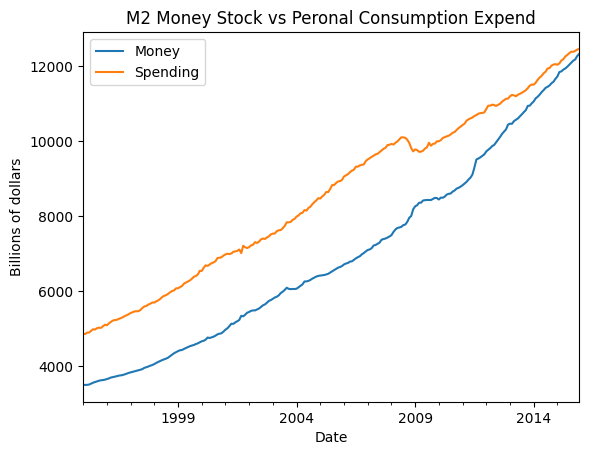

In [89]:
df.plot(ylabel="Billions of dollars",title="M2 Money Stock vs Peronal Consumption Expend")

#### stationary check and transfomations to make stationary

In [90]:
# INCLUDED HERE IF YOU CHOOSE TO USE IT
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [92]:
from pmdarima import auto_arima

auto_arima(df['Money'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [93]:
auto_arima(df['Spending'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [94]:
df_transformed=df.diff().diff()
df_transformed=df_transformed.dropna()
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [95]:
len(df_transformed)

250

#### train test split

In [96]:
nobs=12
train, test=df_transformed[0:-nobs], df_transformed[-nobs:]

In [97]:
train.shape, test.shape

((238, 2), (12, 2))

### Fitting VARMA 1,2 Model

In [98]:
model=VARMAX(train, order=(1,2),trend="c")
results=model.fit(maxiter=1000,disp=False)
results.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2286.068
,+ intercept,AIC,4606.136
Date:,"Thu, 20 Jul 2023",BIC,4665.165
Time:,21:26:21,HQIC,4629.926
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.39, 0.00",Jarque-Bera (JB):,"559.96, 125.81"
Prob(Q):,"0.53, 0.95",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.64, 2.90",Skew:,"1.34, -0.35"


#### Forecasting next 12 values

In [99]:
df_forecast=results.forecast(12)
df_forecast

,Money,Spending
2015-01-01,-12.694635,38.344362
2015-02-01,-10.927281,-5.540071
2015-03-01,1.482099,0.080905
2015-04-01,-1.689457,-0.488199
2015-05-01,1.099531,0.411824
2015-06-01,-0.441778,-0.032076
2015-07-01,0.532000,0.259768
2015-08-01,-0.057235,0.085296
2015-09-01,0.304154,0.192716
2015-10-01,0.083450,0.127192


#### inverting the transformation back to original vals

In [100]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money'].cumsum()

In [101]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending'].cumsum()

In [102]:
df_forecast

,Money,Spending,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-12.694635,38.344362,65.905365,11657.405365,48.944362,12100.344362
2015-02-01,-10.927281,-5.540071,54.978083,11646.478083,43.404291,12094.804291
2015-03-01,1.482099,0.080905,56.460182,11647.960182,43.485195,12094.885195
2015-04-01,-1.689457,-0.488199,54.770725,11646.270725,42.996997,12094.396997
2015-05-01,1.099531,0.411824,55.870255,11647.370255,43.408821,12094.808821
2015-06-01,-0.441778,-0.032076,55.428478,11646.928478,43.376745,12094.776745
2015-07-01,0.532000,0.259768,55.960477,11647.460477,43.636513,12095.036513
2015-08-01,-0.057235,0.085296,55.903243,11647.403243,43.721809,12095.121809
2015-09-01,0.304154,0.192716,56.207396,11647.707396,43.914524,12095.314524
2015-10-01,0.083450,0.127192,56.290846,11647.790846,44.041717,12095.441717


In [103]:
pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingForecast']]],axis=1)

,Money,Spending,MoneyForecast,SpendingForecast
2015-01-01,11733.2,12046.0,11657.405365,12100.344362
2015-02-01,11852.4,12082.4,11646.478083,12094.804291
2015-03-01,11868.8,12158.3,11647.960182,12094.885195
2015-04-01,11916.1,12193.8,11646.270725,12094.396997
2015-05-01,11947.6,12268.1,11647.370255,12094.808821
2015-06-01,11993.1,12308.3,11646.928478,12094.776745
2015-07-01,12045.3,12355.4,11647.460477,12095.036513
2015-08-01,12096.8,12394.0,11647.403243,12095.121809
2015-09-01,12153.8,12392.8,11647.707396,12095.314524
2015-10-01,12187.7,12416.1,11647.790846,12095.441717


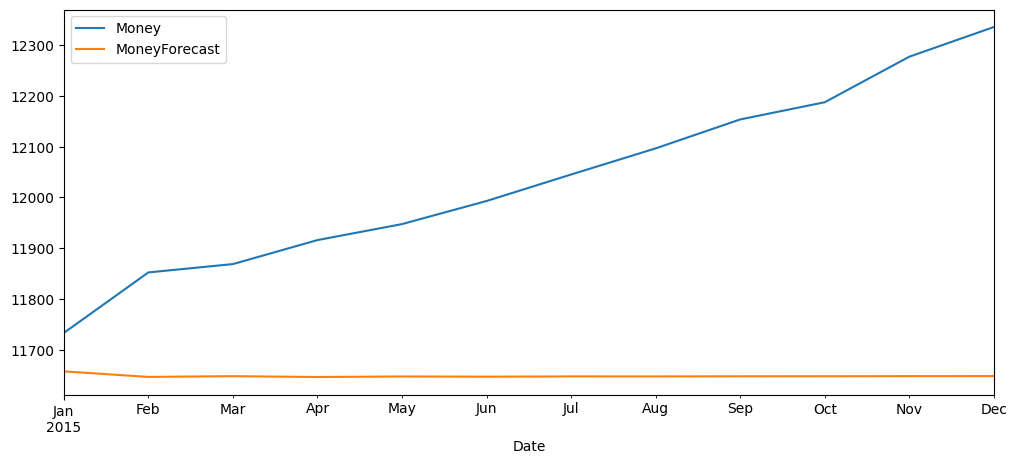

In [104]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

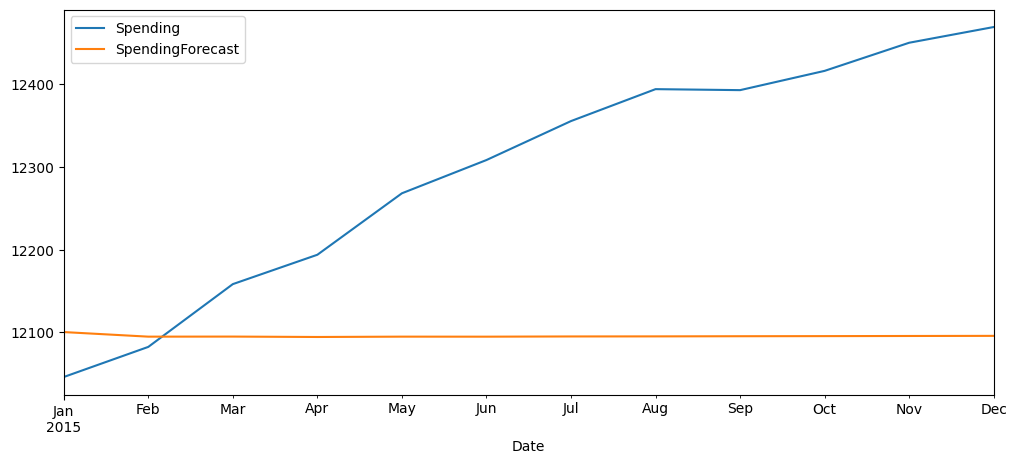

In [105]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

#### Evaluate the model

In [106]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Money VAR(5) RMSE: 423.940
Spending VAR(5) RMSE: 242.577


### Compare with ARMA(1,2)

In [114]:
from statsmodels.tsa.arima.model import ARIMA

In [116]:
model = ARIMA(train['Money'],order=(1,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Money   No. Observations:                  238
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1117.710
Date:                Thu, 20 Jul 2023   AIC                           2245.421
Time:                        21:31:41   BIC                           2262.782
Sample:                    03-01-1995   HQIC                          2252.418
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1814      0.032      5.639      0.000       0.118       0.244
ar.L1         -0.3568      0.176     -2.029      0.042      -0.701      -0.012
ma.L1         -0.4087      1.937     -0.211      0.833      -4.205       3.388
ma.L2         -0.5911      1.102     -0.537      0.592      -2.750       1.568
sigma2       687.2002   1307.788      0.525      0.599   -1876.017    3250.417
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):               775.34
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               6.83   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
start=len(train)
end=len(train)+len(test)-1
z1 = results.predict(start=start, end=end).rename('Money')
z1 = pd.DataFrame(z1)

In [118]:
z1

,Money
2015-01-01,-14.429077
2015-02-01,-10.904154
2015-03-01,4.136412
2015-04-01,-1.229654
2015-05-01,0.684813
2015-06-01,0.001783
2015-07-01,0.245470
2015-08-01,0.158529
2015-09-01,0.189547
2015-10-01,0.178481


#### imvert and evaluate the forecast

In [119]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + z1['Money'].cumsum()

# Now build the forecast values from the first difference set
z1['MoneyForecast'] = df['Money'].iloc[-nobs-1] + z1['Money1d'].cumsum()

In [120]:
z1

,Money,Money1d,MoneyForecast
2015-01-01,-14.429077,64.170923,11734.270923
2015-02-01,-10.904154,53.266769,11787.537692
2015-03-01,4.136412,57.403182,11844.940874
2015-04-01,-1.229654,56.173527,11901.114401
2015-05-01,0.684813,56.858341,11957.972742
2015-06-01,0.001783,56.860124,12014.832865
2015-07-01,0.245470,57.105593,12071.938459
2015-08-01,0.158529,57.264122,12129.202581
2015-09-01,0.189547,57.453669,12186.656250
2015-10-01,0.178481,57.632150,12244.288400


In [121]:
RMSE3 = rmse(df['Money'][-nobs:], z1['MoneyForecast'])

print(f'Money VARMA(1,2) RMSE: {RMSE1:.3f}')
print(f'Money  ARMA(1,2) RMSE: {RMSE3:.3f}')

Money VARMA(1,2) RMSE: 423.940
Money  ARMA(1,2) RMSE: 32.684


#### Personal Spending

In [122]:
model = ARIMA(train['Spending'],order=(1,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Spending   No. Observations:                  238
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1182.411
Date:                Thu, 20 Jul 2023   AIC                           2374.823
Time:                        21:32:43   BIC                           2392.184
Sample:                    03-01-1995   HQIC                          2381.820
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.279      0.307      0.759      -0.461       0.632
ar.L1         -0.3403      0.545     -0.624      0.532      -1.408       0.728
ma.L1         -0.6451      0.549     -1.174      0.240      -1.722       0.432
ma.L2         -0.2139      0.507     -0.422      0.673      -1.207       0.779
sigma2      1201.3966     66.509     18.064      0.000    1071.042    1331.751
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               184.55
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
start=len(train)
end=len(train)+len(test)-1
z2 = results.predict(start=start, end=end).rename('Spending')
z2 = pd.DataFrame(z2)
z2

,Spending
2015-01-01,33.555507
2015-02-01,-3.338121
2015-03-01,1.250569
2015-04-01,-0.310791
2015-05-01,0.220481
2015-06-01,0.039709
2015-07-01,0.101219
2015-08-01,0.080290
2015-09-01,0.087411
2015-10-01,0.084988


In [124]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [125]:
z2

,Spending,Spending1d,SpendingForecast
2015-01-01,33.555507,44.155507,12106.155507
2015-02-01,-3.338121,40.817387,12146.972894
2015-03-01,1.250569,42.067955,12189.040850
2015-04-01,-0.310791,41.757165,12230.798014
2015-05-01,0.220481,41.977646,12272.775660
2015-06-01,0.039709,42.017355,12314.793015
2015-07-01,0.101219,42.118575,12356.911590
2015-08-01,0.080290,42.198864,12399.110454
2015-09-01,0.087411,42.286276,12441.396730
2015-10-01,0.084988,42.371264,12483.767994


In [126]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VARMA(1,2) RMSE: {RMSE2:.3f}')
print(f'Spending  ARMA(1,2) RMSE: {RMSE4:.3f}')

Spending VARMA(1,2) RMSE: 242.577
Spending  ARMA(1,2) RMSE: 52.332


##### VARMA does poor job than ARMA model